In [7]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv(r'C:\Users\Promise Sunday\Documents\Weather_Report_Lagos.csv', parse_dates=['date'])

# Define flood threshold (adjust as needed)
FLOOD_THRESHOLD = 50  # mm of precipitation

# Create flood column
df['flood'] = df['prcp'] > FLOOD_THRESHOLD

# Function to predict next flood
def predict_next_flood(df):
    flood_dates = df[df['flood']]['date'].sort_values()
    if len(flood_dates) < 2:
        return "Not enough flood data to make a prediction"
    
    flood_intervals = flood_dates.diff().dropna()
    avg_interval = flood_intervals.mean()
    last_flood_date = flood_dates.max()
    last_data_date = df['date'].max()
    
    next_predicted_flood = last_flood_date + avg_interval
    
    # If the predicted date is in the past, add intervals until it's in the future
    while next_predicted_flood <= last_data_date:
        next_predicted_flood += avg_interval
    
    # Adjust for seasonal patterns
    month_weights = df[df['flood']].groupby(df['date'].dt.month).size() / len(flood_dates)
    while month_weights.get(next_predicted_flood.month, 0) < 0.1:  # Adjust threshold as needed
        next_predicted_flood += timedelta(days=30)
    
    return next_predicted_flood

# Predict next flood
next_flood_date = predict_next_flood(df)

print(f"Last data date: {df['date'].max()}")
print(f"Next predicted flood: {next_flood_date}")

# Display some statistics
print(f"Number of floods: {df['flood'].sum()}")
print(f"Average days between floods: {df[df['flood']]['date'].diff().dropna().mean().days}")

# Sample of the data with the new flood column
print("\nSample of data (first 10 rows with non-null precipitation):")
print(df[df['prcp'].notnull()][['date', 'prcp', 'flood']].head(10))

# Print the last 5 flood events
print("\nLast 5 flood events:")
print(df[df['flood']][['date', 'prcp']].tail())

# Analyze seasonal patterns
df['month'] = df['date'].dt.month
monthly_flood_freq = df[df['flood']].groupby('month').size()
print("\nMonthly flood frequency:")
print(monthly_flood_freq)

# Check for missing data
missing_data = df['prcp'].isnull().sum()
total_data_points = len(df)
print(f"\nMissing precipitation data points: {missing_data} out of {total_data_points} ({missing_data/total_data_points:.2%})")

# Analyze missing data by year
df['year'] = df['date'].dt.year
missing_by_year = df[df['prcp'].isnull()].groupby('year').size()
print("\nMissing data points by year:")
print(missing_by_year)

# Check for years with no flood events
years_with_floods = df[df['flood']]['year'].unique()
all_years = df['year'].unique()
years_without_floods = set(all_years) - set(years_with_floods)
print("\nYears with no recorded flood events:")
print(sorted(years_without_floods))

Last data date: 2024-07-05 00:00:00
Next predicted flood: 2024-10-05 13:42:51.428571426
Number of floods: 43
Average days between floods: 132

Sample of data (first 10 rows with non-null precipitation):
          date  prcp  flood
154 2008-06-03   0.0  False
155 2008-06-04  45.0  False
156 2008-06-05   1.0  False
157 2008-06-06   0.0  False
159 2008-06-08  68.1   True
160 2008-06-09  73.9   True
161 2008-06-10   0.0  False
164 2008-06-13  22.1  False
165 2008-06-14  11.9  False
166 2008-06-15   0.0  False

Last 5 flood events:
           date  prcp
5555 2023-03-18  51.1
5637 2023-06-08  66.0
5640 2023-06-11  67.1
5682 2023-07-23  66.4
5725 2023-09-04  57.9

Monthly flood frequency:
month
1      1
2      1
3      1
5      5
6     13
7      9
8      1
9      3
10     6
11     3
dtype: int64

Missing precipitation data points: 4691 out of 6031 (77.78%)

Missing data points by year:
year
2008    338
2009    322
2010    344
2011    340
2012    319
2013    335
2014    339
2015    331
2016   

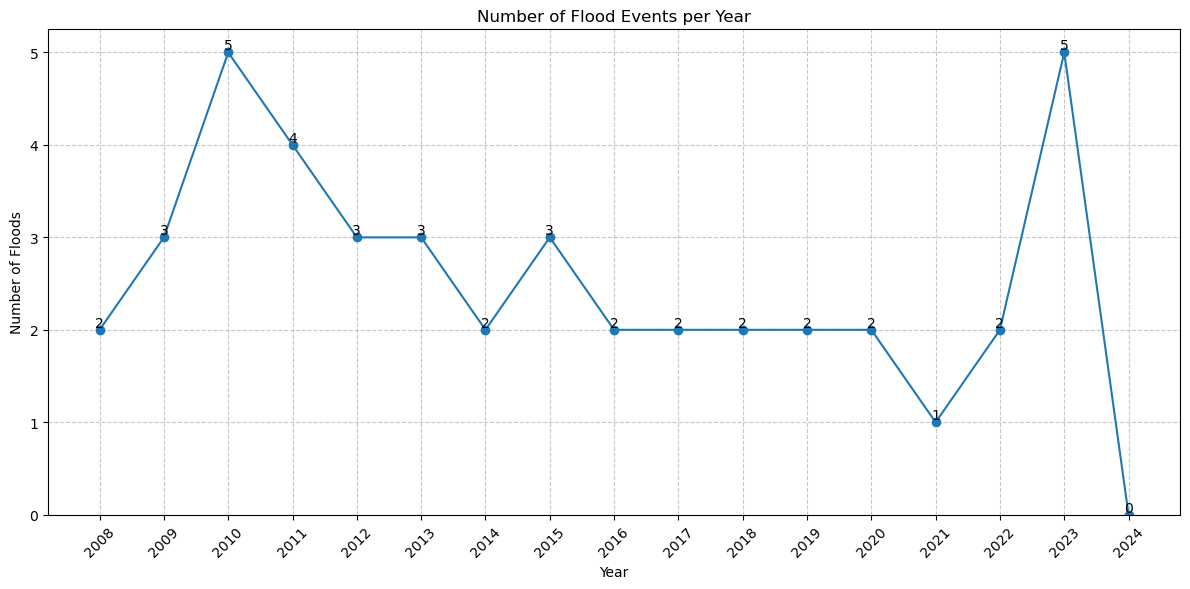

In [4]:
import matplotlib.pyplot as plt

# Data
years = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
floods = [2, 3, 5, 4, 3, 3, 2, 3, 2, 2, 2, 2, 2, 1, 2, 5, 0]

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(years, floods, marker='o')

# Customize the chart
plt.title('Number of Flood Events per Year')
plt.xlabel('Year')
plt.ylabel('Number of Floods')
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(years, rotation=45)

# Set y-axis to start from 0 and have integer ticks
plt.ylim(bottom=0)
plt.yticks(range(max(floods)+1))

# Add value labels on the data points
for i, v in enumerate(floods):
    plt.text(years[i], v, str(v), ha='center', va='bottom')

# Adjust layout and display the chart
plt.tight_layout()
plt.show() 

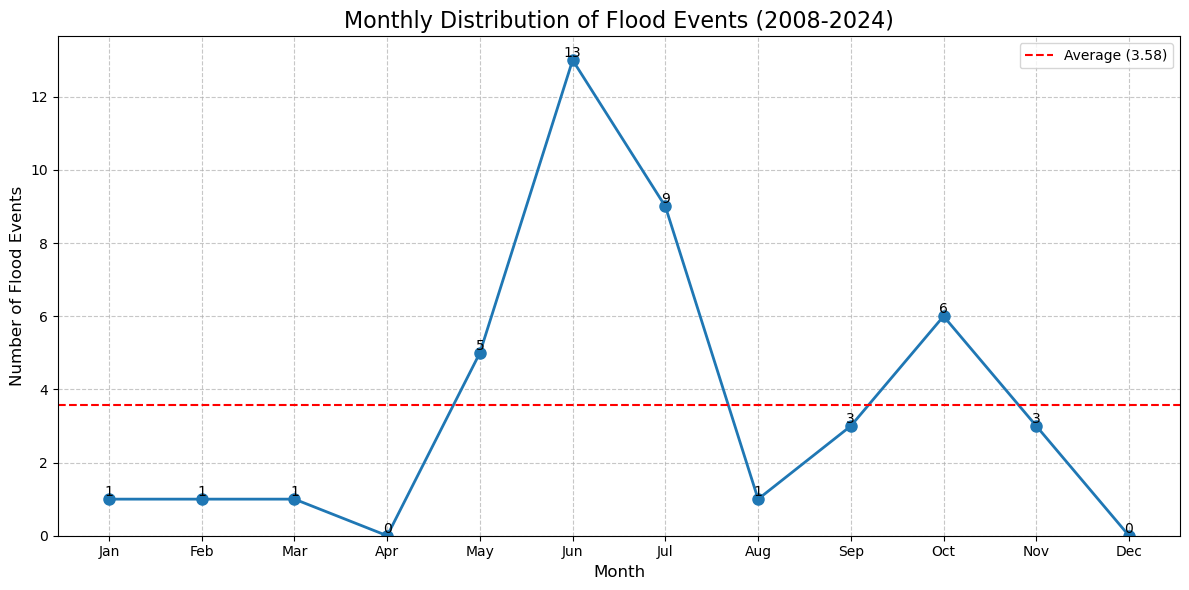

In [5]:
import matplotlib.pyplot as plt

# Data from the monthly flood frequency
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
flood_counts = [1, 1, 1, 0, 5, 13, 9, 1, 3, 6, 3, 0]

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(months, flood_counts, marker='o', linestyle='-', linewidth=2, markersize=8)

# Customize the chart
plt.title('Monthly Distribution of Flood Events (2008-2024)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Flood Events', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Set y-axis to start from 0
plt.ylim(bottom=0)

# Add value labels on the data points
for i, v in enumerate(flood_counts):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

# Customize the tick labels
plt.xticks(range(len(months)), months, rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Add a horizontal line for the average number of floods
avg_floods = sum(flood_counts) / len(flood_counts)
plt.axhline(y=avg_floods, color='r', linestyle='--', label=f'Average ({avg_floods:.2f})')

plt.legend(fontsize=10)

# Adjust layout and display the chart
plt.tight_layout()
plt.show()

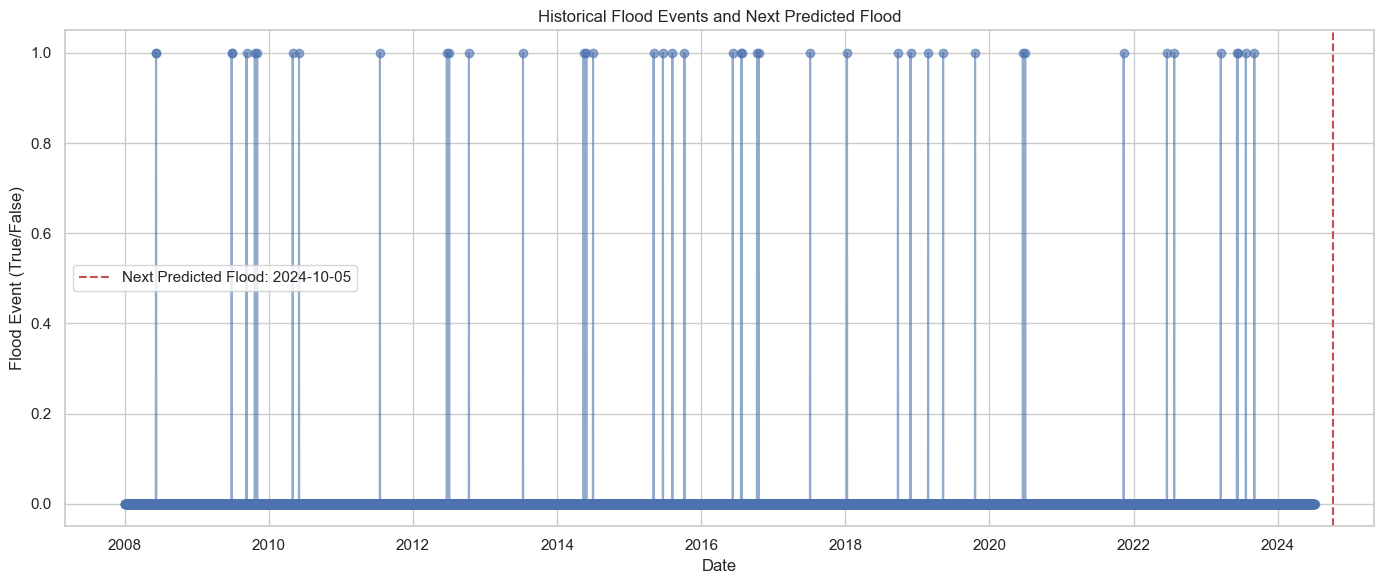

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set(style="whitegrid")

# Plot historical flood events
plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['flood'], linestyle='-', marker='o', color='b', alpha=0.6)
plt.axvline(x=next_flood_date, color='r', linestyle='--', label=f'Next Predicted Flood: {next_flood_date.date()}')
plt.title('Historical Flood Events and Next Predicted Flood')
plt.xlabel('Date')
plt.ylabel('Flood Event (True/False)')
plt.legend()

plt.tight_layout()
plt.show()
